In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(X_test, y_test)

0.933240611961057

In [6]:
y_predict = log_reg.predict(X_test)

In [7]:
from sklearn.metrics import precision_score

# precision_score(y_test, y_predict) 默认只能解决单分类 average参数

In [8]:
help(precision_score)

Help on function precision_score in module sklearn.metrics.classification:

precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    Compute the precision
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labels to include when ``average != 'binary'``, and their
        ord

In [9]:
precision_score(y_test, y_predict, average='micro')

0.933240611961057

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict) # 天然支持多分类

array([[135,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 128,   3,   1,   2,   1,   3,   0,   3,  11],
       [  0,   0, 135,   1,   0,   0,   0,   0,   2,   0],
       [  0,   2,   2, 135,   0,   1,   0,   1,   8,   3],
       [  0,   4,   0,   0, 131,   0,   0,   1,   1,   0],
       [  1,   0,   0,   0,   0, 149,   0,   0,   2,   0],
       [  2,   0,   0,   0,   0,   2, 138,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 143,   0,   1],
       [  0,   9,   0,   2,   0,   2,   6,   1, 112,   2],
       [  1,   1,   0,   3,   0,   2,   0,   2,   5, 136]], dtype=int64)

In [11]:
cfm = confusion_matrix(y_test, y_predict)

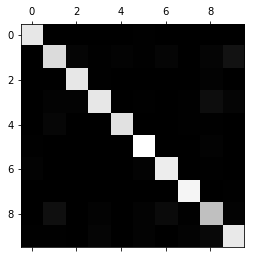

In [16]:
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [13]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02173913, 0.00657895, 0.01459854,
        0.00657895, 0.02097902, 0.        , 0.02238806, 0.07333333],
       [0.        , 0.        , 0.        , 0.00657895, 0.        ,
        0.        , 0.        , 0.        , 0.01492537, 0.        ],
       [0.        , 0.01315789, 0.01449275, 0.        , 0.        ,
        0.00657895, 0.        , 0.00694444, 0.05970149, 0.02      ],
       [0.        , 0.02631579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00694444, 0.00746269, 0.        ],
       [0.00735294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01492537, 0.        ],
       [0.01470588, 0.        , 0.        , 0.        , 0.        ,
        0.01315789, 0.        , 0.        , 0.00746269, 0.        ],
       [0.        , 0.        , 0.       

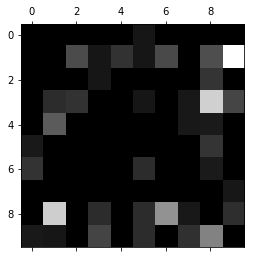

In [15]:
plt.matshow(err_matrix, cmap=plt.cm.gray) # 越亮错的越多
plt.show()